In [115]:
!pip install geopandas
!pip uninstall Fiona==1.9 --yes
!pip install Fiona==1.8
!install xgboost

  Using cached Fiona-1.9.4.post1-cp39-cp39-win_amd64.whl (22.7 MB)
Found existing installation: Fiona 1.9.4.post1
Uninstalling Fiona-1.9.4.post1:
  Successfully uninstalled Fiona-1.9.4.post1


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\WRASH-TECH\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\WRASH-TECH\\AppData\\Local\\Temp\\pip-install-ourtgqok\\fiona_bd3fe3524f024880a18886f92b85311a\\setup.py'"'"'; __file__='"'"'C:\\Users\\WRASH-TECH\\AppData\\Local\\Temp\\pip-install-ourtgqok\\fiona_bd3fe3524f024880a18886f92b85311a\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\WRASH-TECH\AppData\Local\Temp\pip-pip-egg-info-ug7fluzj'
         cwd: C:\Users\WRASH-TECH\AppData\Local\Temp\pip-install-ourtgqok\fiona_bd3fe3524f024880a18886f92b85311a\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a

  Using cached Fiona-1.8.0.tar.gz (1.4 MB)



    ----------------------------------------
ERROR: Could not find a version that satisfies the requirement Fiona==1.8 (from versions: 0.5, 0.6, 0.6.1, 0.6.2, 0.7, 0.8, 0.9, 0.9.1, 0.10, 0.12, 0.12.1, 0.13, 0.14, 0.15, 0.16, 0.16.1, 1.0, 1.0.1, 1.0.2, 1.0.3, 1.1, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5, 1.1.6, 1.2.0, 1.3.0, 1.4.0, 1.4.1, 1.4.2, 1.4.3, 1.4.4, 1.4.5, 1.4.6, 1.4.7, 1.4.8, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.6.3, 1.6.3.post1, 1.6.4, 1.7.0, 1.7.0.post2, 1.7.1, 1.7.1.post1, 1.7.2, 1.7.3, 1.7.4, 1.7.5, 1.7.6, 1.7.7, 1.7.8, 1.7.9, 1.7.9.post1, 1.7.10, 1.7.10.post1, 1.7.11, 1.7.11.post1, 1.7.11.post2, 1.7.12, 1.7.13, 1.8b1, 1.8b2, 1.8rc1, 1.8.0, 1.8.1, 1.8.2, 1.8.3, 1.8.4, 1.8.5, 1.8.6, 1.8.7, 1.8.8, 1.8.9, 1.8.9.post1, 1.8.9.post2, 1.8.10, 1.8.11, 1.8.12, 1.8.13, 1.8.13.post1, 1.8.14, 1.8.15, 1.8.16, 1.8.17, 1.8.18, 1.8.19, 1.8.20, 1.8.21, 1.8.22, 1.9a1, 1.9a2, 1.9a3, 1.9b1, 1.9b2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.9.4, 1.9.4.post1)
ERROR: No matching distribution found for Fiona==1.8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, f1_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier
import geopandas as gpd
from shapely.geometry import  Point
import xgboost as xgb

In [2]:
df = pd.read_csv("San_Francisco_Crime.csv")

In [3]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
df.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212


In [5]:
df.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [6]:
df.sample(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
428160,2009-05-01 08:29:00,OTHER OFFENSES,VIOLATION OF RESTRAINING ORDER,Friday,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271
293426,2011-05-06 08:20:00,ASSAULT,THREATS AGAINST LIFE,Friday,BAYVIEW,NONE,0 Block of POMONA ST,-122.393512,37.731745
413544,2009-07-23 23:34:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,PARK,PSYCHOPATHIC CASE,2100 Block of HAYES ST,-122.451826,37.773263
455105,2008-12-11 21:09:00,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Thursday,PARK,NONE,CARL ST / COLE ST,-122.449958,37.765800
454237,2008-12-14 11:21:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Sunday,INGLESIDE,NONE,1600 Block of SUNNYDALE AV,-122.417145,37.712150


In [7]:
df.shape

(878049, 9)

In [8]:
df.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [9]:
# need for data encoding
df.Resolution.value_counts()

NONE                                      526790
ARREST, BOOKED                            206403
ARREST, CITED                              77004
LOCATED                                    17101
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
JUVENILE BOOKED                             5564
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
NOT PROSECUTED                              3714
JUVENILE CITED                              3332
PROSECUTED BY OUTSIDE AGENCY                2504
EXCEPTIONAL CLEARANCE                       1530
JUVENILE ADMONISHED                         1455
JUVENILE DIVERTED                            355
CLEARED-CONTACT JUVENILE FOR MORE INFO       217
PROSECUTED FOR LESSER OFFENSE                 51
Name: Resolution, dtype: int64

In [10]:
# need for data encoding
df.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

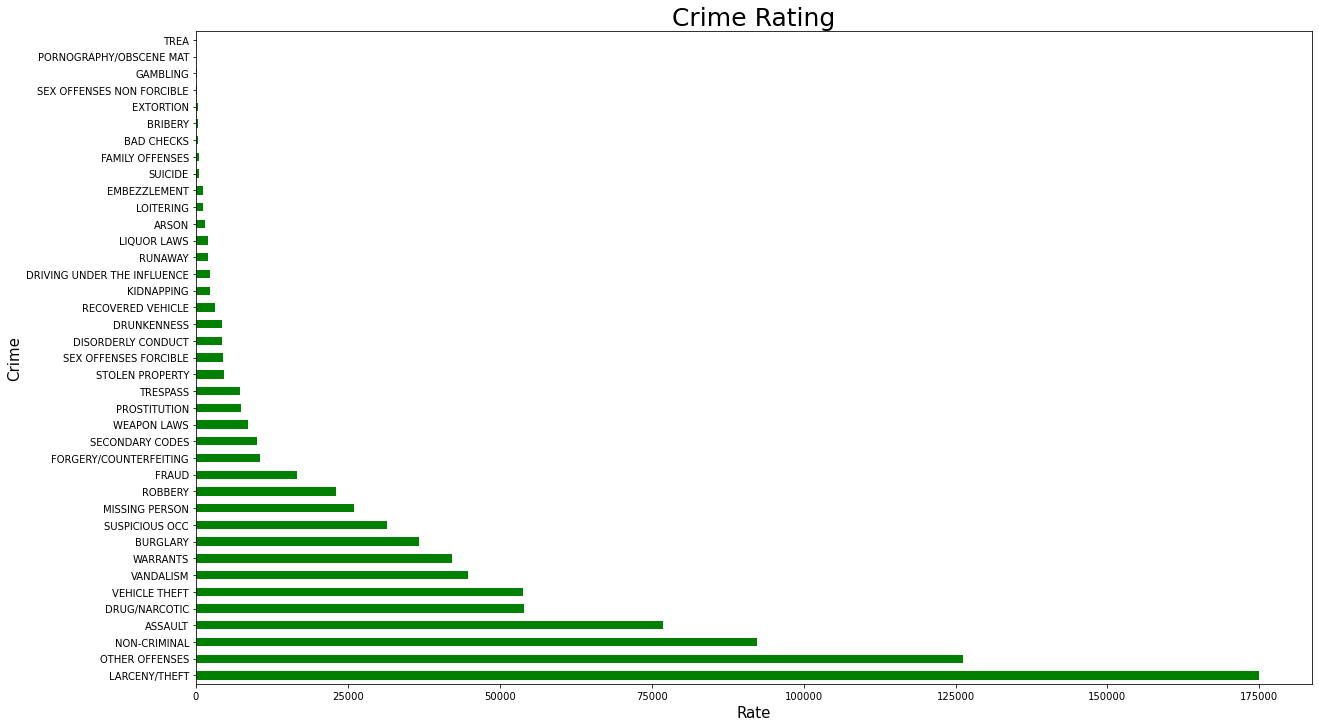

In [11]:
kind = df['Category'].value_counts()

kind.plot(kind="barh",figsize=(20,12),  color='g')

plt.ylabel('Crime',fontsize=15)
plt.xlabel('Rate',fontsize=15)
plt.title('Crime Rating',fontsize=25)
plt.show()

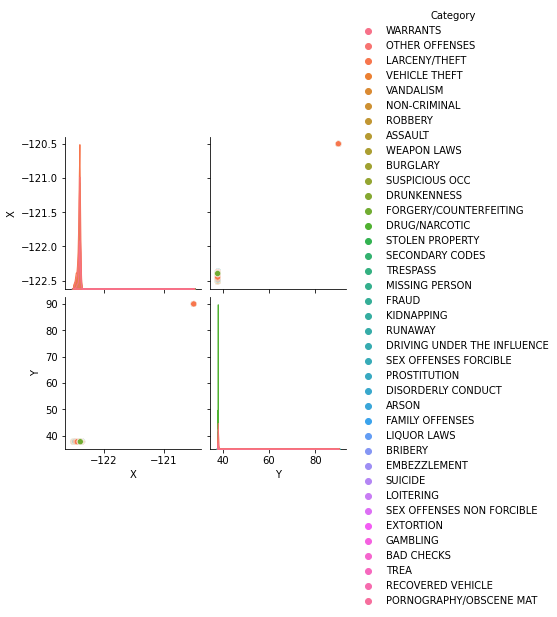

In [12]:
sns.pairplot(df, hue='Category')

In [13]:
# need for data encoding
df.Descript.value_counts()

GRAND THEFT FROM LOCKED AUTO                              60022
LOST PROPERTY                                             31729
BATTERY                                                   27441
STOLEN AUTOMOBILE                                         26897
DRIVERS LICENSE, SUSPENDED OR REVOKED                     26839
                                                          ...  
ENCOURAGE MINOR TO USE CONTROLLED SUBSTANCE                   1
BIGAMY, INCEST, AND THE CRIME AGAINST NATURE (GENERAL)        1
DISTURBANCE OF NON-RELIGIOUS, NON-POLITICAL ASSEMBLY          1
CABLE TV CONNECTION OR DECODING DEVICE, UNAUTHORIZED          1
EMBEZZLEMENT, GRAND THEFT PUBLIC/PRIVATE OFFICIAL             1
Name: Descript, Length: 879, dtype: int64

In [14]:
# need for data encoding
df.Address.value_counts()

800 Block of BRYANT ST           26533
800 Block of MARKET ST            6581
2000 Block of MISSION ST          5097
1000 Block of POTRERO AV          4063
900 Block of MARKET ST            3251
                                 ...  
PRECITA AV / CESAR CHAVEZ ST         1
0 Block of COLUSA PL                 1
2800 Block of KEITH ST               1
CABRILLO ST / ARGUELLO BL            1
OFARRELL ST / CYRIL MAGNIN ST        1
Name: Address, Length: 23228, dtype: int64

In [15]:
# tranforming non numeric data to numeric
data_to_encode = ['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Address',
       'Resolution' ]
for col in data_to_encode:
    if df[col].dtype != np.number:
        df[col] = LabelEncoder().fit_transform(df[col])

C:\Users\WRASH-~1\AppData\Local\Temp/ipykernel_13000/951775591.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype != np.number:
C:\Users\WRASH-~1\AppData\Local\Temp/ipykernel_13000/951775591.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype != np.number:
C:\Users\WRASH-~1\AppData\Local\Temp/ipykernel_13000/951775591.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype != np.number:
C:\Users\WRASH-~1\AppData\Local\Temp/ipykernel_13000/951775591.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype != np.

In [16]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,37,866,6,4,0,19790,-122.425892,37.774599
1,2015-05-13 23:53:00,21,810,6,4,0,19790,-122.425892,37.774599
2,2015-05-13 23:33:00,21,810,6,4,0,22697,-122.424363,37.800414
3,2015-05-13 23:30:00,16,404,6,4,11,4266,-122.426995,37.800873
4,2015-05-13 23:30:00,16,404,6,5,11,1843,-122.438738,37.771541


In [17]:
df.isna().any()

Dates         False
Category      False
Descript      False
DayOfWeek     False
PdDistrict    False
Resolution    False
Address       False
X             False
Y             False
dtype: bool

In [18]:
df.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [19]:
df = df.drop(labels='Dates', axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    878049 non-null  int32  
 1   Descript    878049 non-null  int32  
 2   DayOfWeek   878049 non-null  int32  
 3   PdDistrict  878049 non-null  int32  
 4   Resolution  878049 non-null  int32  
 5   Address     878049 non-null  int32  
 6   X           878049 non-null  float64
 7   Y           878049 non-null  float64
dtypes: float64(2), int32(6)
memory usage: 33.5 MB


In [21]:
df.shape

(878049, 8)

In [22]:
df.sample(3)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
216646,25,663,5,9,11,11495,-122.416916,37.784394
363582,37,866,0,0,0,16556,-122.405590,37.729777
617773,21,415,6,7,11,12308,-122.403405,37.775421


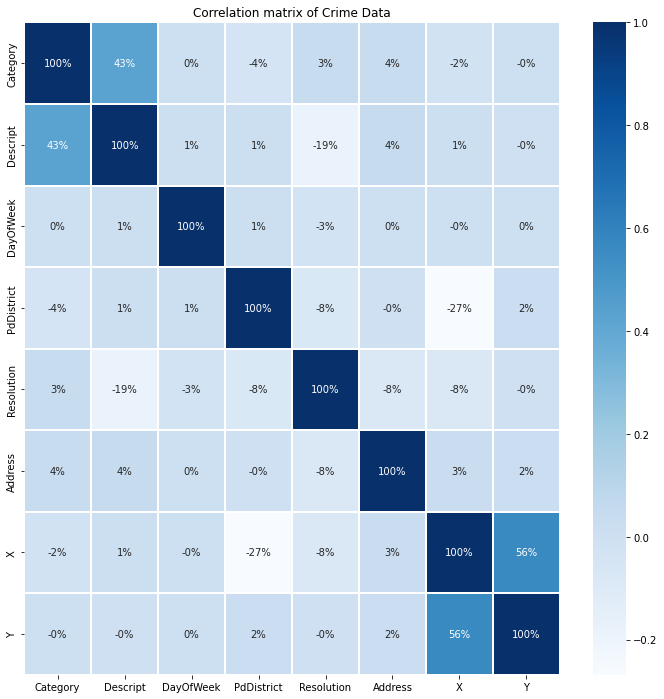

In [23]:
#checking how each of the column influence each other 
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(),
           annot = True,
           cmap = "Blues",
            fmt=".0%",
           linewidths = 2, 
           linecolor = "white")
plt.title("Correlation matrix of Crime Data")
plt.show()

Text(0.5, 1.0, 'PdDistrict')

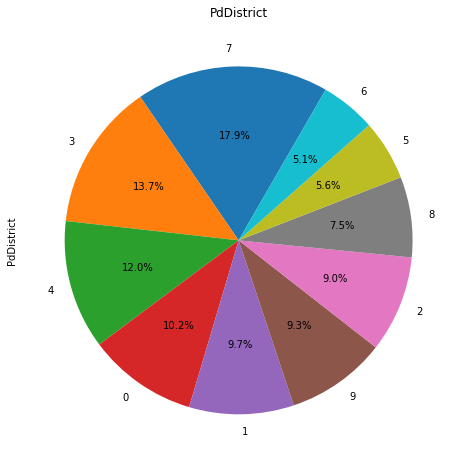

In [24]:
plt.figure(figsize=(8,8))
explode=(0.1,0.05,0.05)
df['PdDistrict'].value_counts().plot.pie(autopct='%1.1f%%',startangle=60)
plt.title('PdDistrict')

In [25]:
df = df.drop(labels=['X', 'Y'], axis=1)

# Feature Selection using Chi-Square

In [26]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# Feature Extraction
# Extract the features and target variable from the dataset
X = df.drop(labels=['Category'], axis=1 ) # Select the relevant features
y = df['Category']  # Target variable

# Perform feature selection using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=5)  # Adjust 'k' as needed
selected_features = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X.columns[selected_indices]

In [27]:
# print the selected features
selected_feature_names

Index(['Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address'], dtype='object')

In [28]:
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.30, random_state=0)

# Decision Tree

In [29]:
tree = DecisionTreeClassifier(random_state=42, max_depth=11)
tree.fit(X_train, Y_train)
    
print (tree.score(X_train, Y_train))

0.9648376106756216


In [30]:
y_pred = tree.predict(X_test)

In [31]:
y_pred[:10]

array([38, 21, 37,  1, 37, 20,  4, 21, 26,  4])

In [32]:
dt_accuracy = accuracy_score(Y_test, y_pred)
dt_precision = precision_score(Y_test, y_pred, average='macro')
dt_recall = recall_score(Y_test, y_pred, average='macro')
dt_f1 = f1_score(Y_test, y_pred, average='macro')



print("=================Decision Tree Performance Report =============")
print('accuracy : ', dt_accuracy)
print('precision : ', dt_precision)
print('recall : ', dt_recall)
print('f1 : ', dt_f1)

C:\Users\WRASH-TECH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


=================Decision Tree Performance Report =============
accuracy :  0.9646147713683731
precision :  0.8535267406041078
recall :  0.7514646838532919
f1 :  0.7683826204554619


# XGboost

In [33]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)
print (xgb_model.score(X_train, Y_train))
xgb_pred = xgb_model.predict(X_test)

0.9984397218507274


In [34]:
xgb_accuracy = accuracy_score(Y_test, xgb_pred)
xgb_precision = precision_score(Y_test, xgb_pred, average='macro')
xgb_recall = recall_score(Y_test, xgb_pred, average='macro')
xgb_fl = f1_score(Y_test, xgb_pred, average='macro')

print("=================XGBoost Performance Report =============")
print('accuracy : ', xgb_accuracy)
print('precision : ', xgb_precision)
print('recall : ', xgb_recall)
print('f1 : ', xgb_fl)

=================XGBoost Performance Report =============
accuracy :  0.9971641706053186
precision :  0.9883689451626034
recall :  0.983865205746298
f1 :  0.9847509239132695


# KNN

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_test)

In [36]:
knn_accuracy = accuracy_score(Y_test, knn_predictions)
knn_precision = precision_score(Y_test, knn_predictions, average='macro')
knn_recall = recall_score(Y_test, knn_predictions, average='macro')
knn_f1 = f1_score(Y_test, knn_predictions, average='macro')



print("=================KNN Performance Report =============")
print('accuracy : ', knn_accuracy)
print('precision : ', knn_precision)
print('recall : ', knn_recall)
print('f1 : ', knn_f1)

C:\Users\WRASH-TECH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


=================KNN Performance Report =============
accuracy :  0.8750412846648824
precision :  0.6382200565323136
recall :  0.5361199334492446
f1 :  0.5607028359601752


#  Hybridization 

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

In [40]:
# Create the base estimators
base_estimators = [
    ('decision_tree', DecisionTreeClassifier()),
#     ('xgb', xgb.XGBClassifier()),
    ('knn', KNeighborsClassifier())
]

# Create the stacked ensemble model using StackingClassifier
stacked_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=DecisionTreeClassifier()  # Use a Decision Tree as the meta-model
)

# Train the stacked ensemble model
stacked_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = stacked_model.predict(X_test)

C:\Users\WRASH-TECH\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\WRASH-TECH\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [41]:
print("================ Stack Model Classification Result ==========================")
hybrid_report = classification_report(Y_test, y_pred, digits=2)
print(hybrid_report)

================ Stack Model Classification Result ==========================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00     23137
           2       1.00      1.00      1.00       118
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00     10890
           5       1.00      1.00      1.00      1226
           6       1.00      1.00      1.00       701
           7       1.00      1.00      1.00     16338
           8       1.00      1.00      1.00      1260
           9       1.00      1.00      1.00       340
          10       1.00      1.00      1.00        82
          11       1.00      0.99      0.99       144
          12       1.00      1.00      1.00      3161
          13       1.00      1.00      1.00      4929
          14       1.00      1.00      1.00        48
          15       0.88      0.96      0.92       714
   

In [42]:
hyb_accuracy = accuracy_score(Y_test, y_pred)
hyb_precision = precision_score(Y_test, y_pred, average='macro')
hyb_recall = recall_score(Y_test, y_pred, average='macro')
hyb_f1 = f1_score(Y_test, y_pred, average='macro')



print("=================Stacked Model Tree Performance Report =============")
print('accuracy : ', hyb_accuracy)
print('precision : ', hyb_precision)
print('recall : ', hyb_recall)
print('f1 : ', hyb_f1)

=================Stacked Model Tree Performance Report =============
accuracy :  0.9969819486361825
precision :  0.9780936046703156
recall :  0.9897142325621167
f1 :  0.9826481138744005


In [43]:
hy_box = pd.DataFrame({
    'index':[0, 1, 2, 3],
    'Accuracy': [float(xgb_accuracy), float(dt_accuracy), float(knn_accuracy), float(hyb_accuracy)],
    'Models':['XGB', 'DT', 'KNN', 'Hybrid']
})
hy_box.head()

,index,Accuracy,Models
0,0,0.997164,XGB
1,1,0.964615,DT
2,2,0.875041,KNN
3,3,0.996982,Hybrid


In [44]:
def plot_graph(df, title, x):
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.set_style('whitegrid')
    sns.barplot(data=df, x=x, y="Accuracy")
    ax.set_title(f'{title}')
    plt.show()

In [45]:
dt_stack = pd.DataFrame({
    'index':[0, 1],
    'Accuracy': [ float(dt_accuracy), float(hyb_accuracy)],
    'Models':['DT', 'STACK']
})
dt_stack.head()

,index,Accuracy,Models
0,0,0.964615,DT
1,1,0.996982,STACK


In [46]:
knn_stack = pd.DataFrame({
    'index':[0, 1],
    'Accuracy': [ float(knn_accuracy), float(hyb_accuracy)],
    'Models':['KNN', 'STACK']
})
knn_stack.head()

,index,Accuracy,Models
0,0,0.875041,KNN
1,1,0.996982,STACK


In [47]:
dt_knn = pd.DataFrame({
    'index':[0, 1],
    'Accuracy': [ float(dt_accuracy), float(knn_accuracy)],
    'Models':['DT', 'KNN']
})
dt_knn.head()

,index,Accuracy,Models
0,0,0.964615,DT
1,1,0.875041,KNN


In [48]:
dt_xgb = pd.DataFrame({
    'index':[0, 1],
    'Accuracy': [ float(dt_accuracy), float(xgb_accuracy)],
    'Models':['DT', 'XGB']
})
dt_xgb.head()

,index,Accuracy,Models
0,0,0.964615,DT
1,1,0.997164,XGB


In [49]:
knn_xgb = pd.DataFrame({
    'index':[0, 1],
    'Accuracy': [ float(dt_accuracy), float(xgb_accuracy)],
    'Models':['DT', 'XGB']
})
dt_xgb.head()

,index,Accuracy,Models
0,0,0.964615,DT
1,1,0.997164,XGB


In [55]:
xgb_stack = pd.DataFrame({
    'index':[0, 1],
    'Accuracy': [ float(xgb_accuracy), float(hyb_accuracy)],
    'Models':['XGB', 'STACK']
})
xgb_stack.head()

,index,Accuracy,Models
0,0,0.997164,XGB
1,1,0.996982,STACK


In [51]:
model_box = pd.DataFrame({
    'index':[0, 1, 2],
    'Accuracy': [float(xgb_accuracy), float(dt_accuracy), float(knn_accuracy)],
    'Models':['XGB', 'DT', 'KNN']
})
model_box.head()

,index,Accuracy,Models
0,0,0.997164,XGB
1,1,0.964615,DT
2,2,0.875041,KNN


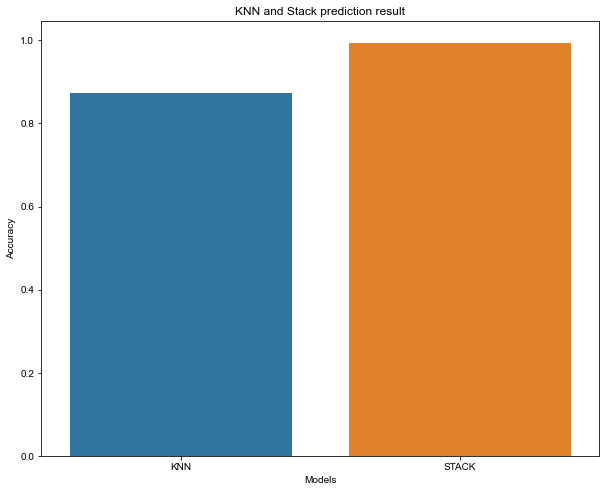

In [52]:
# KNN and STACK
plot_graph(df=knn_stack, title="KNN and Stack prediction result", x="Models")

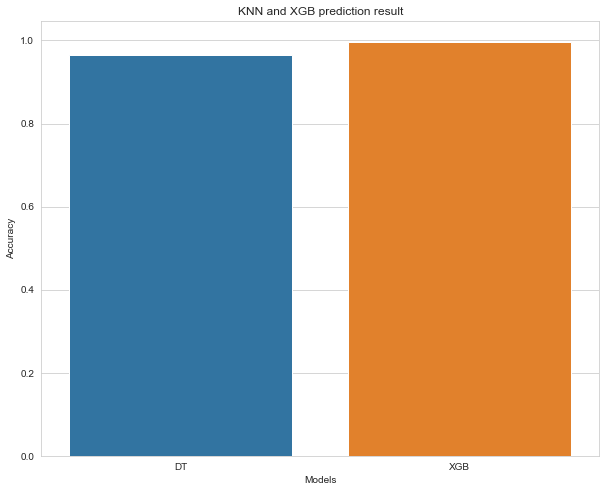

In [53]:
plot_graph(df=knn_xgb, title="KNN and XGB prediction result", x="Models")

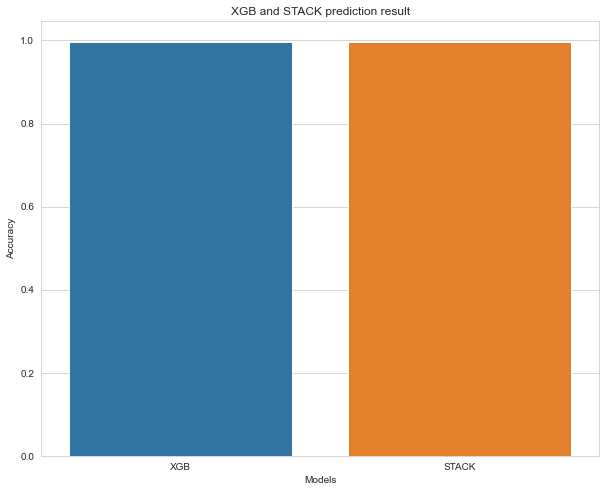

In [56]:
# xgb_stack
plot_graph(df=xgb_stack, title="XGB and STACK prediction result", x="Models")

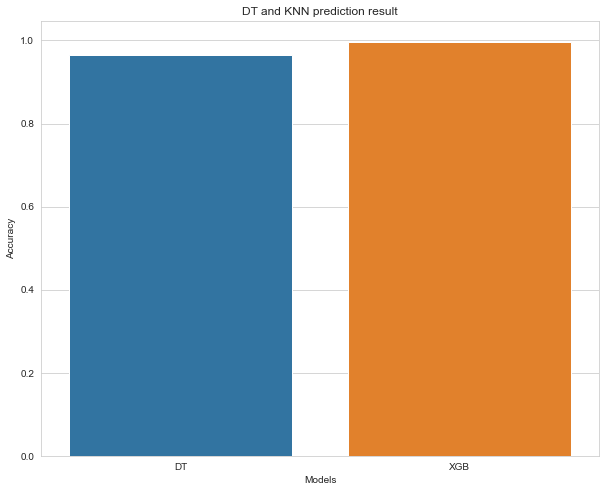

In [57]:
plot_graph(df=dt_xgb, title="DT and KNN prediction result", x="Models")

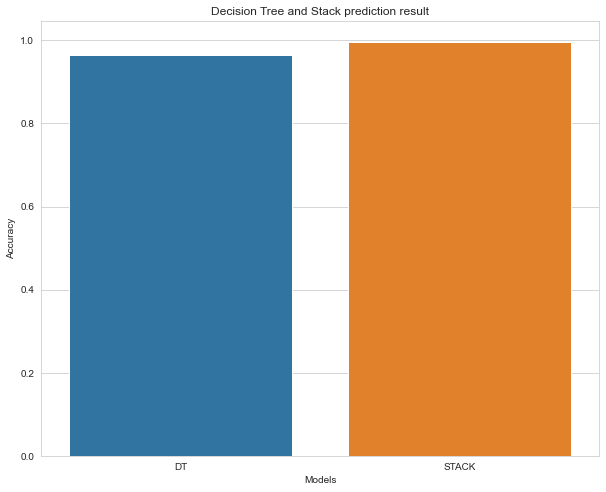

In [58]:
# STACK and Decision Tree
plot_graph(df=dt_stack, title="Decision Tree and Stack prediction result", x="Models")

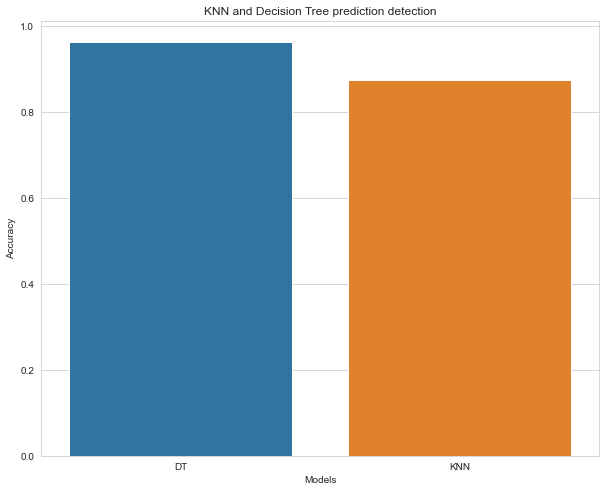

In [59]:
# KNN and Decision Tree
plot_graph(df=dt_knn, title="KNN and Decision Tree prediction detection", x="Models")

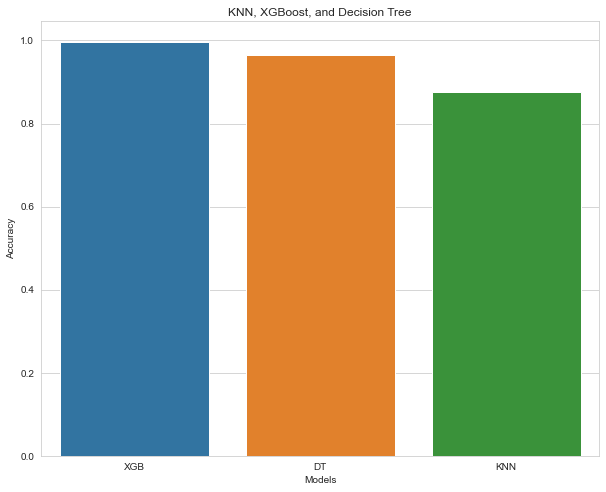

In [60]:
plot_graph(df=model_box, title="KNN, XGBoost, and Decision Tree", x="Models")

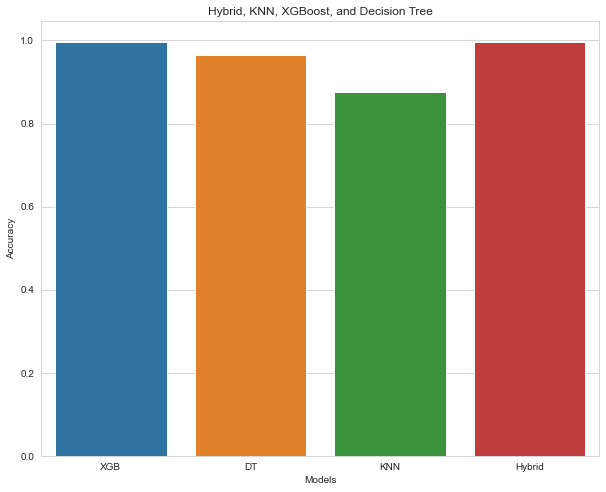

In [61]:
plot_graph(df=hy_box, title="Hybrid, KNN, XGBoost, and Decision Tree", x="Models")